In [1]:
import pandas as pd

In [2]:
df_entrenamiento = pd.read_csv("df_entrenamiento_final (2).csv")
df_prueba = pd.read_csv("df_prueba_final (2).csv")


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


# Variables categóricas y numéricas
categorical_features = ['categoria_instalaciones', 'Flavor', 'sub_canal_comercial',
                        'ProductType', 'Returnability', 'Size', 'Container', 'MLSize']

# Seleccionar las columnas de entrada y salida para entrenamiento y prueba
X_train_full = df_entrenamiento[['categoria_instalaciones', 'pc_comercial_300m', 'Flavor', 'MLSize',
                                 'pc_negocios_300m', 'pc_turismo_300m', 'gasto_promedio_300m',
                                 'ingreso_promedio_300m', 'accesibilidad', 'sub_canal_comercial',
                                 'ProductType', 'Returnability', 'Size', 'Container',
                                 'success_ratio', 'success_ratio_flavor', 'success_ratio_mlsize',
                                 'success_ratio_container', 'pob_ab_300m', 'pob_cmas_300m',
                                 'pob_c_300m', 'pob_cmen_300m', 'pob_dmas_300m', 'pob_d_300m',
                                 'pob_e_300m']]
y_train_full = df_entrenamiento['successful']

X_test = df_prueba[['categoria_instalaciones', 'pc_comercial_300m', 'Flavor', 'MLSize',
                    'pc_negocios_300m', 'pc_turismo_300m', 'gasto_promedio_300m',
                    'ingreso_promedio_300m', 'accesibilidad', 'sub_canal_comercial',
                    'ProductType', 'Returnability', 'Size', 'Container',
                    'success_ratio', 'success_ratio_flavor', 'success_ratio_mlsize',
                    'success_ratio_container', 'pob_ab_300m', 'pob_cmas_300m',
                    'pob_c_300m', 'pob_cmen_300m', 'pob_dmas_300m', 'pob_d_300m',
                    'pob_e_300m']]
y_test = df_prueba['successful']

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Concatenar para garantizar consistencia en categorías
X_combined = pd.concat([X_train, X_val, X_test], axis=0)
X_encoded = pd.get_dummies(X_combined, columns=categorical_features, drop_first=True)

# Dividir nuevamente en entrenamiento, validación y prueba
X_train_encoded = X_encoded.iloc[:len(X_train), :]
X_val_encoded = X_encoded.iloc[len(X_train):len(X_train) + len(X_val), :]
X_test_encoded = X_encoded.iloc[len(X_train) + len(X_val):, :]

# Crear el modelo
model = Sequential()

# Capa de entrada
model.add(Dense(64, input_dim=X_train_encoded.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Capas ocultas
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Capa de salida
model.add(Dense(1, activation='sigmoid'))  # Usamos sigmoide para una salida binaria

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    X_train_encoded,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_encoded, y_val),
    verbose=1
)

# Evaluar en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val_encoded, y_val, verbose=0)
print(f'Precisión en el conjunto de validación: {val_accuracy:.2f}')

# Generar predicciones para el conjunto de validación
y_val_pred = (model.predict(X_val_encoded) > 0.5).astype(int)
print("\nReporte de clasificación en el conjunto de validación:")
print(classification_report(y_val, y_val_pred))
print("\nMatriz de confusión en el conjunto de validación:")
print(confusion_matrix(y_val, y_val_pred))

# Evaluar en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_encoded, y_test, verbose=0)
print(f'\nPrecisión en el conjunto de prueba: {test_accuracy:.2f}')

# Generar predicciones para el conjunto de prueba
y_test_pred = (model.predict(X_test_encoded) > 0.5).astype(int)
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred))
print("\nMatriz de confusión en el conjunto de prueba:")
print(confusion_matrix(y_test, y_test_pred))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6023 - loss: 0.7585 - val_accuracy: 0.7678 - val_loss: 0.5497
Epoch 2/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7646 - loss: 0.5618 - val_accuracy: 0.7678 - val_loss: 0.5451
Epoch 3/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7664 - loss: 0.5507 - val_accuracy: 0.7678 - val_loss: 0.5434
Epoch 4/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7716 - loss: 0.5418 - val_accuracy: 0.7678 - val_loss: 0.5424
Epoch 5/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7627 - loss: 0.5506 - val_accuracy: 0.7678 - val_loss: 0.5421
Epoch 6/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7667 - loss: 0.5446 - val_accuracy: 0.7678 - val_loss: 0.5426
Epoch 7/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7660 - loss: 0.5451 - val_accuracy: 0.7678 - val_loss: 0.5422
Epoch 8/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7615 - loss: 0.5495 - val_accuracy: 0

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


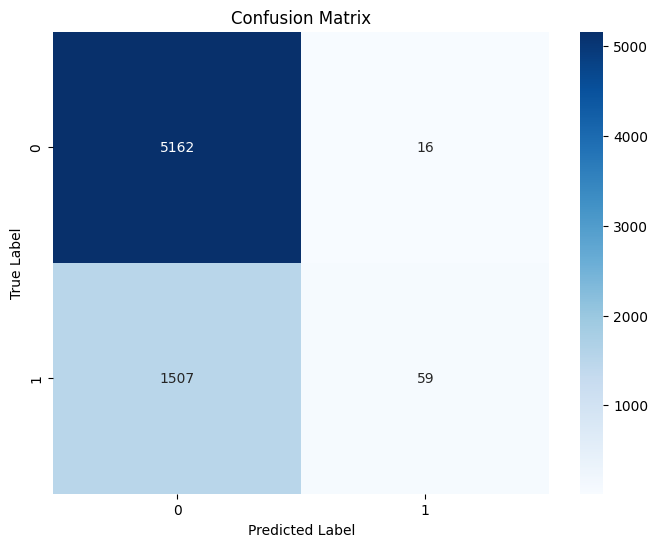

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import confusion_matrix

# Obtener las probabilidades predichas
y_pred_prob = model.predict(X_test_encoded)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convertir probabilidades a etiquetas

# Crear la matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)

# Dibujar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


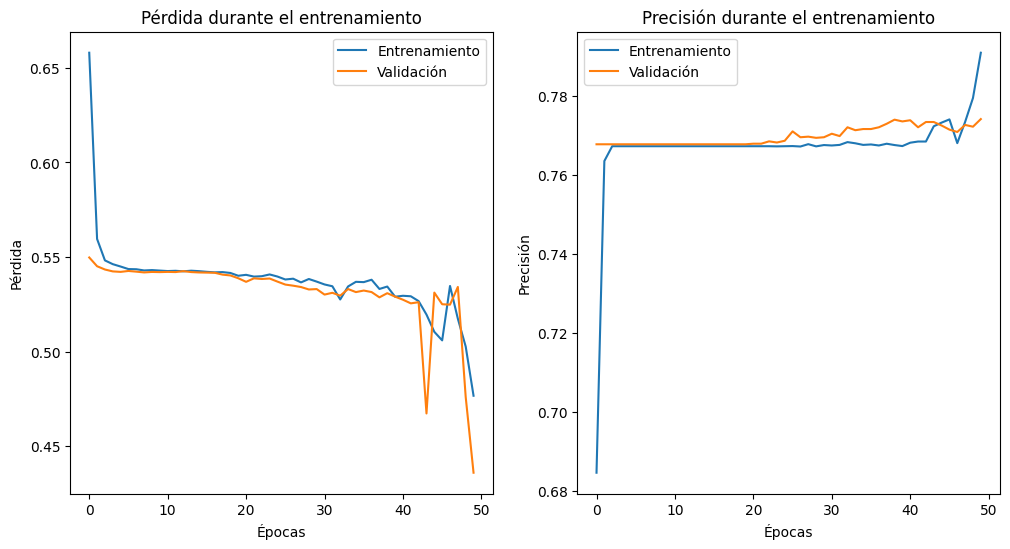

In [5]:
# Graficar el rendimiento
plt.figure(figsize=(12, 6))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()
